In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid")

# Visualización de la evolución de variables con respecto al tiempo

No todo los datos pueden ser analisados con la *gráfica de disperción*, en ocasiones es necesario visualizar una variable con respecto al tiempo. Recuerde que el método de visualización debe adaptarse al tipo de datos. Para estos caso, Seaborn utiliza $\texttt{lineplot()}$---para esto se configura $\texttt{kind=line}$.

Vamos a crear 10 números aleatorios

In [ ]:
value=np.random.randn(10) # Distribución Normal (Gaussiana)
value

array([-0.52370849,  0.71200199,  0.2446583 , -1.11121561, -1.86332496,
       -0.91408374,  2.98141847,  0.31458425,  0.79008286,  0.1413111 ])

Cada posición va a ser la suma de los todos los valores a la izquierda

In [ ]:
value.cumsum()

array([-0.52370849,  0.1882935 ,  0.43295181, -0.6782638 , -2.54158876,
       -3.45567249, -0.47425403, -0.15966978,  0.63041308,  0.77172418])

In [ ]:
dict(Edad=18)

{'Edad': 18}

Ahora vamos a hacer lo mismo para 500 números

In [ ]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
dict(clave=10, nombre="Jose")

{'clave': 10, 'nombre': 'Jose'}

In [ ]:
HH = 129
DD = HH // 24
hh = HH % 24

print(f"{DD}:{hh}")

5:9


In [ ]:
l = [f"{str(i//24)}:{i % 24:2d}" for i in range(500)]
np.array(l)

array(['0: 0', '0: 1', '0: 2', '0: 3', '0: 4', '0: 5', '0: 6', '0: 7',
       '0: 8', '0: 9', '0:10', '0:11', '0:12', '0:13', '0:14', '0:15',
       '0:16', '0:17', '0:18', '0:19', '0:20', '0:21', '0:22', '0:23',
       '1: 0', '1: 1', '1: 2', '1: 3', '1: 4', '1: 5', '1: 6', '1: 7',
       '1: 8', '1: 9', '1:10', '1:11', '1:12', '1:13', '1:14', '1:15',
       '1:16', '1:17', '1:18', '1:19', '1:20', '1:21', '1:22', '1:23',
       '2: 0', '2: 1', '2: 2', '2: 3', '2: 4', '2: 5', '2: 6', '2: 7',
       '2: 8', '2: 9', '2:10', '2:11', '2:12', '2:13', '2:14', '2:15',
       '2:16', '2:17', '2:18', '2:19', '2:20', '2:21', '2:22', '2:23',
       '3: 0', '3: 1', '3: 2', '3: 3', '3: 4', '3: 5', '3: 6', '3: 7',
       '3: 8', '3: 9', '3:10', '3:11', '3:12', '3:13', '3:14', '3:15',
       '3:16', '3:17', '3:18', '3:19', '3:20', '3:21', '3:22', '3:23',
       '4: 0', '4: 1', '4: 2', '4: 3', '4: 4', '4: 5', '4: 6', '4: 7',
       '4: 8', '4: 9', '4:10', '4:11', '4:12', '4:13', '4:14', '4:15',
      

In [ ]:
d = dict(time=np.arange(500), value=np.random.randn(500).cumsum())

In [ ]:
df = pd.DataFrame(d)
df

,time,value
0,0,-0.001822
1,1,-1.607958
2,2,-2.463944
3,3,-3.097239
4,4,-4.064150
...,...,...
495,495,-24.690311
496,496,-22.371273
497,497,-22.285353
498,498,-22.426431


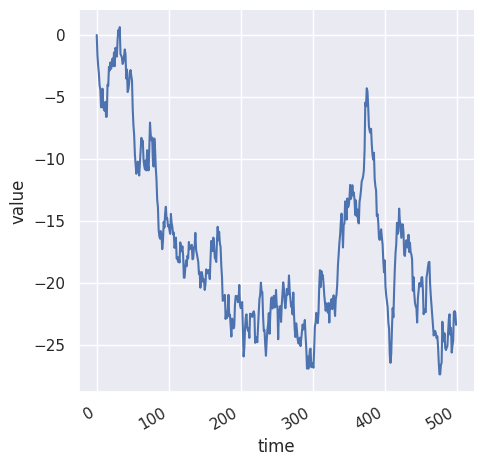

In [ ]:
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.figure.autofmt_xdate()

plt.xticks(np.arange(500)[::50])

Por defecto $\texttt{relplot}$ ordena los valores de $x$. Sin embargo, nostros podemos desabilitar esta opción.

In [ ]:
datos = np.random.randn(3, 2) # media = 0, varianza=1
datos

array([[-0.20707586,  0.56550537],
       [ 1.4392442 , -1.13060106],
       [-0.58836162, -1.23732191]])

In [ ]:
datos.cumsum(axis=0)

array([[-0.20707586,  0.56550537],
       [ 1.23216834, -0.56509569],
       [ 0.64380672, -1.8024176 ]])

In [ ]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
df.head()


,x,y
0,-0.598439,-0.257076
1,-1.286013,0.246202
2,-2.082494,0.563644
3,-1.636027,0.350213
4,-2.427864,0.320587


# Representación de incertidumbre

En algunas bases de datos puede existir una variable que tenga múltiples mediciones. Seaborn, utiliza la media para generar un rango de confianza (95%) al rededor de esta.

Base de datos **fmri**:

La Resonancia Magnética Funcional permite medir la actividad cerebral usando un campo magnético estático para detectar cambios asociados con el flujo sanguíneo. Cuando un área del cerebro está en uso, el flujo de sangre a esa región también aumenta. El aumento del flujo sanguíneo está representado por una señal de mayor amplitud vista como una fuerte actividad neuronal. De esta manera se puede realizar una evaluación funcional de regiones responsables de la sensorialidad, motricidad, cognición y procesos afectivos en cerebros normales y patológicos.

In [ ]:
fmri = sns.load_dataset("fmri")
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [ ]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


Visualizar los datos tal y como están producirá un efecto extraño, el cual será un tanto difícil de interpretar.  

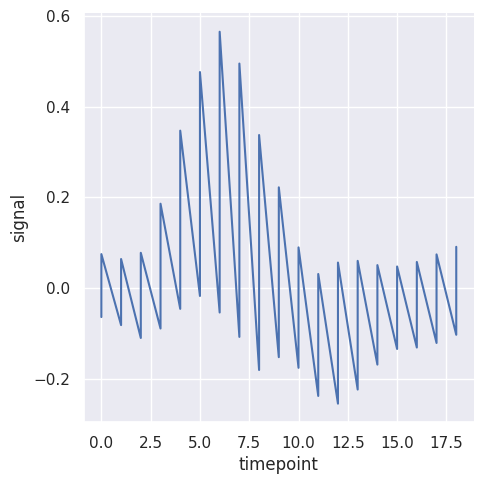

In [ ]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

Para tener una mejor interpretación de los datos utilizamos el rango de confianza.

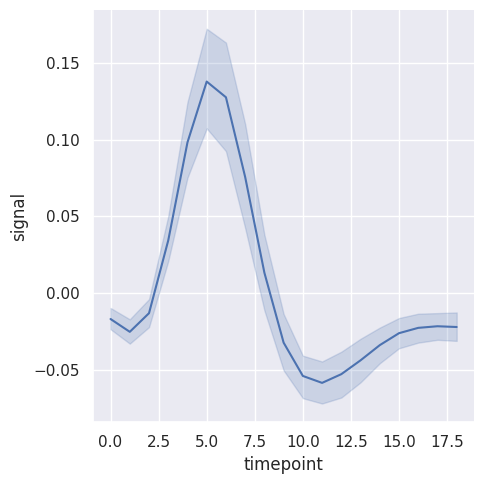

In [ ]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

Este rango de confianza puede suprimirse por completo

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


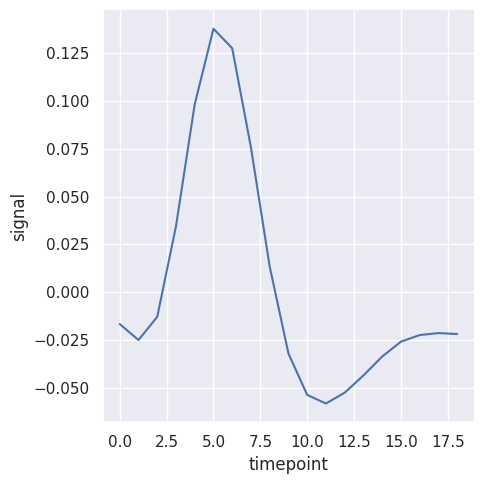

In [ ]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

O en su lugar se puede utilizar la desviación estandar.

$\texttt{sd}$: standard deviation

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


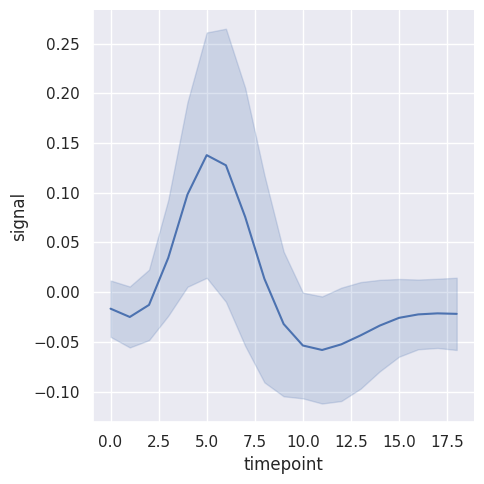

In [ ]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)

De la misma forma que con $\texttt{scatterplot()}$, $\texttt{lineplot()}$ también permite visualizar más de dos variables.

In [ ]:
fmri["event"].describe(include="all")

count     1064
unique       2
top       stim
freq       532
Name: event, dtype: object

In [ ]:
fmri["event"].unique()

array(['stim', 'cue'], dtype=object)

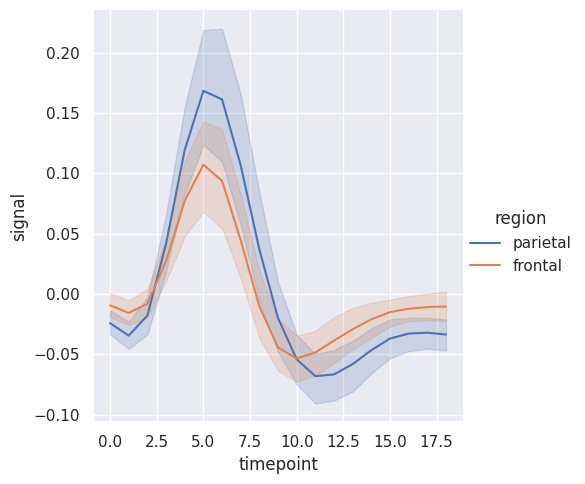

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="region", kind="line", data=fmri);


Podemos añadir una variable más ($\texttt{region}$)

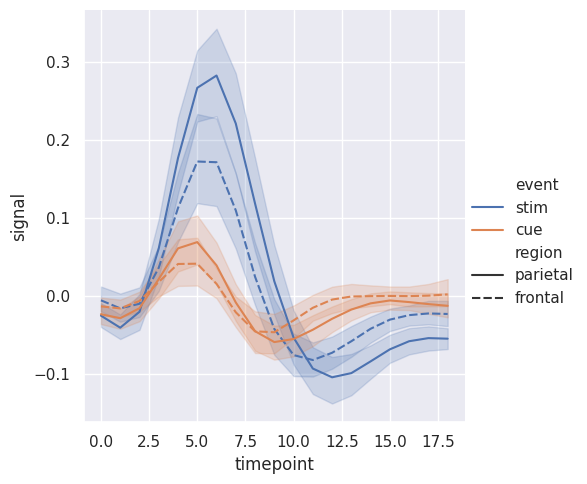

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="event", style="region", kind="line", data=fmri);

Podemos intercambiar el estilo con el color.

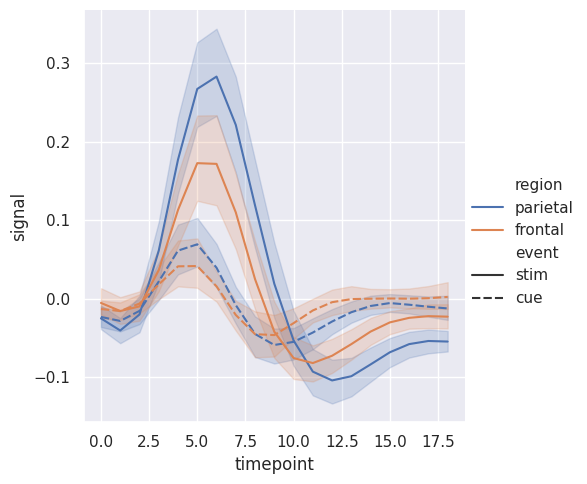

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event", kind="line", data=fmri);


Por defecto el estilo son pundos discontinuos, pero podemos cambiar esto de la siguiente manera

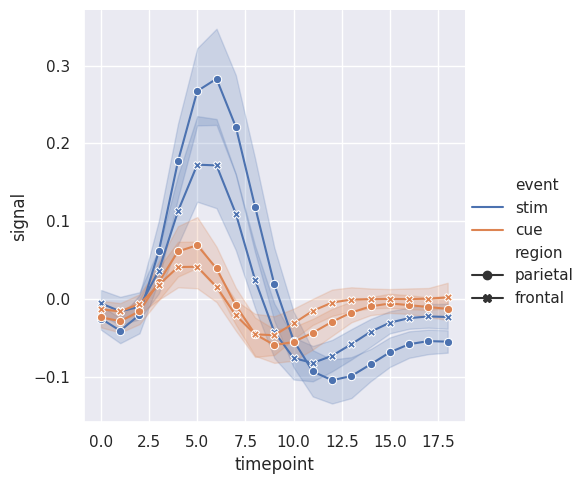

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="event", style="region",
            dashes=False, markers=True, kind="line", data=fmri);
